In [1]:
# Import libraries


import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = 'music_genre.csv'

genre = pd.read_csv(path)
data_backUp = genre

In [2]:
genre.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
genre.shape

(50005, 18)

In [4]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

# Drop unnecessary attributes

In [5]:
genre.drop(columns=['instance_id', 'artist_name','track_name','obtained_date'], axis=1, inplace=True)

# Delete duplicated

In [6]:
genre.duplicated().sum()

5

In [7]:
genre.drop_duplicates(inplace = True)

In [8]:
genre.duplicated().sum()

0

In [9]:
genre = genre.reset_index(drop=True) # Reset the index.

# Find missing values

In [10]:
genre['duration_ms'].describe()

count    4.999900e+04
mean     2.212488e+05
std      1.286705e+05
min     -1.000000e+00
25%      1.748000e+05
50%      2.192800e+05
75%      2.686060e+05
max      4.830606e+06
Name: duration_ms, dtype: float64

In [11]:
# Certain duration_ms values are -1 which can mean invalid/missing values. Solution: Replace -1 with the mean value of duration_ms
genre = genre.replace(-1.0, genre['duration_ms'].mean())

In [12]:
# Checking if all is replaced
genre['duration_ms'].describe()

count    4.999900e+04
mean     2.431043e+05
std      1.060321e+05
min      1.550900e+04
25%      1.948750e+05
50%      2.212488e+05
75%      2.686060e+05
max      4.830606e+06
Name: duration_ms, dtype: float64

In [13]:
genre = genre.replace('?', np.nan)
genre.isna().sum()

popularity             1
acousticness           1
danceability           1
duration_ms            1
energy                 1
instrumentalness       1
key                    1
liveness               1
loudness               1
mode                   1
speechiness            1
tempo               4981
valence                1
music_genre            1
dtype: int64

### remove a row if the row of values are all NaN

In [14]:
rows_all_nan = genre.isna().all(axis=1) # a list of rows that are all NaN


In [15]:
genre[rows_all_nan].index # checking

Index([9999], dtype='int64')

In [16]:
genre.dropna(how='all', inplace = True)

In [17]:
genre = genre.reset_index(drop=True) # Reset the index.

In [18]:
genre.isna().sum()

popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               4980
valence                0
music_genre            0
dtype: int64

Convert the 'tempo' column to a float64 data type. Since the original dataset contains multiple '?' symbols in this column, these need to be replaced with a suitable numeric value.

After replacing the '?' symbols, ensure that all values in the 'tempo' column are of float64 data type.

In [19]:
non_numeric = pd.to_numeric(genre['tempo'], errors='coerce').isna()

indices_non_numeric = genre[non_numeric].index

print(genre.loc[indices_non_numeric, 'tempo'])


5        NaN
32       NaN
35       NaN
36       NaN
39       NaN
        ... 
49912    NaN
49958    NaN
49961    NaN
49970    NaN
49971    NaN
Name: tempo, Length: 4980, dtype: object


In [20]:
original_data = pd.to_numeric(genre['tempo'], errors='coerce')

original_data.describe()

count    45019.000000
mean       119.953677
std         30.641664
min         34.347000
25%         94.942000
50%        119.880000
75%        140.474500
max        220.276000
Name: tempo, dtype: float64

In [21]:
from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame and 'column_name' is the column you're working with
# Convert the column to numeric, coercing errors to NaN
numeric_column = pd.to_numeric(genre['tempo'], errors='coerce')

# Create the imputer, using mean as an example strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer; it expects a 2D array, so reshape the column accordingly
filled_values = imputer.fit_transform(numeric_column.values.reshape(-1, 1))

# Convert the result back to float64 and replace the original column
genre['tempo'] = filled_values.astype('float64')


In [22]:
# Calculate basic statistics for each dataset
stats_original = original_data.describe()
stats_modified = genre['tempo'].describe()

# Compare statistics
comparison = pd.concat([stats_original, stats_modified], axis=1, keys=['Original', 'Modified'])

print(comparison)

           Original      Modified
count  45019.000000  49999.000000
mean     119.953677    119.953677
std       30.641664     29.075630
min       34.347000     34.347000
25%       94.942000     96.776500
50%      119.880000    119.953677
75%      140.474500    139.468500
max      220.276000    220.276000


In [23]:
genre.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [24]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        49999 non-null  float64
 1   acousticness      49999 non-null  float64
 2   danceability      49999 non-null  float64
 3   duration_ms       49999 non-null  float64
 4   energy            49999 non-null  float64
 5   instrumentalness  49999 non-null  float64
 6   key               49999 non-null  object 
 7   liveness          49999 non-null  float64
 8   loudness          49999 non-null  float64
 9   mode              49999 non-null  object 
 10  speechiness       49999 non-null  float64
 11  tempo             49999 non-null  float64
 12  valence           49999 non-null  float64
 13  music_genre       49999 non-null  object 
dtypes: float64(11), object(3)
memory usage: 5.3+ MB


Data

In [25]:
genre['music_genre'].describe().unique()

array([49999, 10, 'Anime', 5000], dtype=object)

In [26]:
# Required modules
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Separating non-numeric columns (key and mode) from numeric columns
num_cols = genre.select_dtypes(include='number').columns.to_list()
cat_cols = genre.select_dtypes(exclude='number').columns.to_list()

# Splitting target from the variables
cat_cols.remove('music_genre')

# Pipelines for columns
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Preprocessor
preprocessor = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)], remainder='passthrough')


In [27]:
# Display preprocessor and columns
print(num_cols, cat_cols)
preprocessor

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] ['key', 'mode']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['popularity', 'acousticness', 'danceability',
                                  'duration_ms', 'energy', 'instrumentalness',
                                  'liveness', 'loudness', 'speechiness',
                                  'tempo', 'valence']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['key', 'mode'])])

In [28]:
# Apply preprocessing
genre_prep = preprocessor.fit_transform(genre)

# Re-apply column headers and convert to DataFrame
feature = preprocessor.get_feature_names_out()
genre_prep = pd.DataFrame(data=genre_prep, columns=feature)

print(genre_prep.shape)
genre_prep

(49999, 26)


,num__popularity,num__acousticness,num__danceability,num__duration_ms,num__energy,num__instrumentalness,num__liveness,num__loudness,num__speechiness,num__tempo,...,cat__key_D,cat__key_D#,cat__key_E,cat__key_F,cat__key_F#,cat__key_G,cat__key_G#,cat__mode_Major,cat__mode_Minor,remainder__music_genre
0,-1.10804,-0.883879,0.524892,-0.206124,1.289855,1.875921,-0.48812,0.638114,-0.185331,-0.655699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Electronic
1,-0.850668,-0.860384,0.356947,-0.234001,1.097081,2.361486,-0.432439,0.339232,-0.627263,-0.170305,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Electronic
2,-1.043697,-0.888625,0.345751,-0.259276,0.586795,-0.521788,2.104114,0.732874,-0.582873,0.276534,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Electronic
3,-0.657639,-0.823177,1.207864,-0.718934,0.3789,-0.550277,-0.228278,0.752183,1.434431,0.277222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Electronic
4,-0.786325,-0.883967,0.446518,-0.195559,-0.048228,2.235485,-0.228278,0.465307,-0.515794,0.862667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.950934,-0.79974,1.986005,-0.206124,-0.097366,-0.558052,-0.463373,0.342639,2.016441,-0.754099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Hip-Hop
49995,1.787393,-0.437638,0.843985,0.082576,-0.898704,-0.558052,-0.52524,-0.11039,-0.380649,0.071859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Hip-Hop
49996,0.436191,-0.8801,0.754415,-0.505714,0.617034,-0.558052,-0.314892,0.598847,0.517026,0.382638,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Hip-Hop
49997,1.336992,-0.654138,1.252649,0.185499,-0.482916,-0.558052,-0.5438,0.668132,-0.488173,-1.515638,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Hip-Hop


In [29]:
from sklearn.model_selection import train_test_split

X = genre_prep.drop(['remainder__music_genre'], axis=1)
y = genre_prep['remainder__music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # Expected ~4k/1k split

(39999, 25) (10000, 25) (39999,) (10000,)


First choice: SVC Prediction Model

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', C=0.1, gamma=1)
svm.fit(X_train, y_train.values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

In [31]:
# Testing
from sklearn.metrics import classification_report
y_predict = svm.predict(X_train)
print("Scoring on trained data:\n" + classification_report(y_train, y_predict))
y_predict = svm.predict(X_test)
print("Scoring on untrained data:\n" + classification_report(y_test, y_predict))

Scoring on trained data:
              precision    recall  f1-score   support

 Alternative       0.60      0.60      0.60      3992
       Anime       0.88      0.89      0.89      3966
       Blues       0.76      0.73      0.74      3991
   Classical       0.95      0.94      0.95      4045
     Country       0.67      0.70      0.69      4015
  Electronic       0.83      0.78      0.80      3990
     Hip-Hop       0.60      0.66      0.63      3989
        Jazz       0.79      0.72      0.76      4015
         Rap       0.61      0.54      0.58      3969
        Rock       0.66      0.77      0.71      4027

    accuracy                           0.73     39999
   macro avg       0.74      0.73      0.73     39999
weighted avg       0.74      0.73      0.73     39999

Scoring on untrained data:
              precision    recall  f1-score   support

 Alternative       0.38      0.41      0.39      1008
       Anime       0.68      0.72      0.70      1034
       Blues       0.52   

High accuracies for Anime, Classical for both trained and untrained.
Low accuracy for predicting Alternative and Country.
Around the same ranking for predicting genre on both trained and untrained.

<Figure size 4000x4000 with 0 Axes>

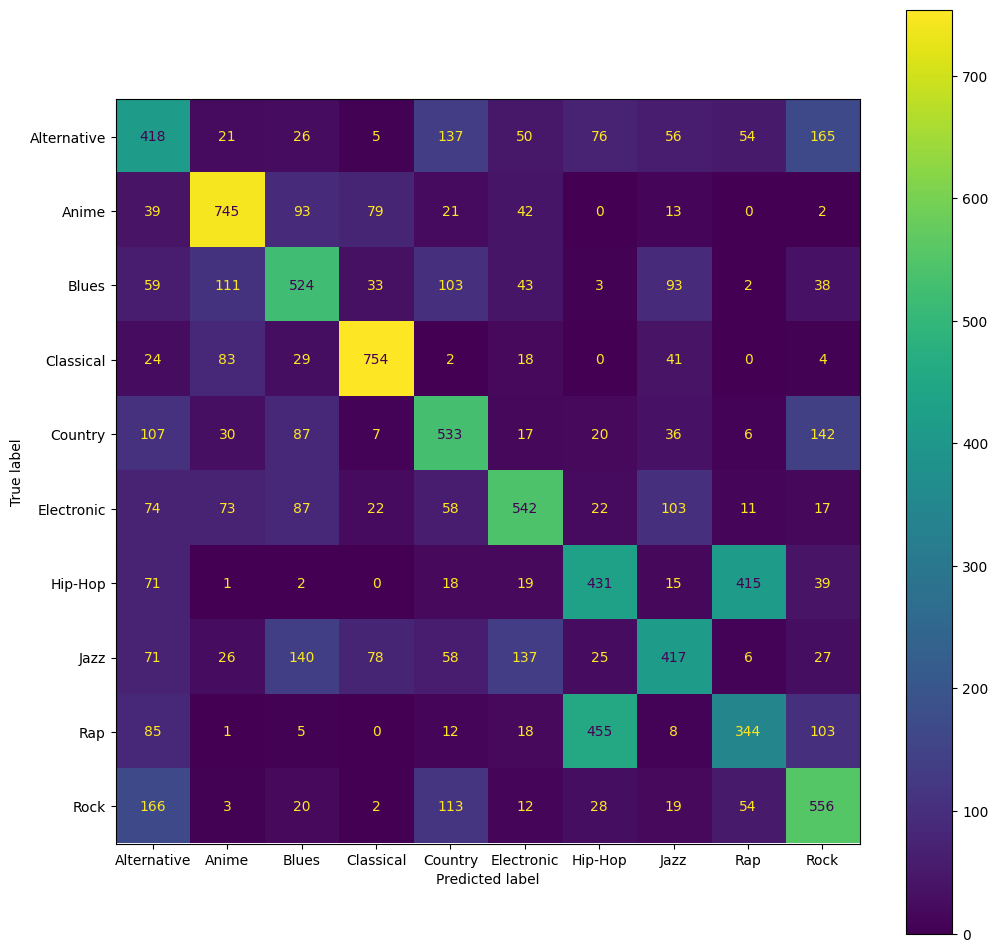

In [32]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(40,40))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
fig = display.ax_.get_figure()
fig.set_figheight(12)
fig.set_figwidth(12)

Checking for better values of kernel, gamma, and C

In [33]:
# Split the data
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29999, 25) (29999,) (10000, 25) (10000,) (10000, 25) (10000,)


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# For finding better vectors (DO NOT RUN WITHOUT ILOC)
# original code author luisguiserrano

svm_parameters = {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 2, 5, 10], 'gamma': [0.01, 1, 2, 5, 10]}
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_
print(svm_winner.score(X_validation, y_validation))
# Time taken: 12m

0.5159


In [36]:
print(svm_gs.best_params_)

{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}


Confusion Matrix for with better vectors

In [37]:
svm_winner.fit(X_train, y_train.values.ravel())

SVC(C=0.01, gamma=1, kernel='poly')

Scoring on trained data:
              precision    recall  f1-score   support

 Alternative       0.58      0.55      0.57      3014
       Anime       0.86      0.84      0.85      2951
       Blues       0.73      0.69      0.71      2949
   Classical       0.93      0.91      0.92      3022
     Country       0.64      0.68      0.66      3029
  Electronic       0.81      0.73      0.76      2962
     Hip-Hop       0.58      0.64      0.61      3002
        Jazz       0.75      0.70      0.72      3015
         Rap       0.59      0.53      0.56      3016
        Rock       0.62      0.77      0.69      3039

    accuracy                           0.70     29999
   macro avg       0.71      0.70      0.70     29999
weighted avg       0.71      0.70      0.70     29999

Scoring on untrained data:
              precision    recall  f1-score   support

 Alternative       0.39      0.40      0.39       988
       Anime       0.72      0.74      0.73       993
       Blues       0.57   

<Figure size 4000x4000 with 0 Axes>

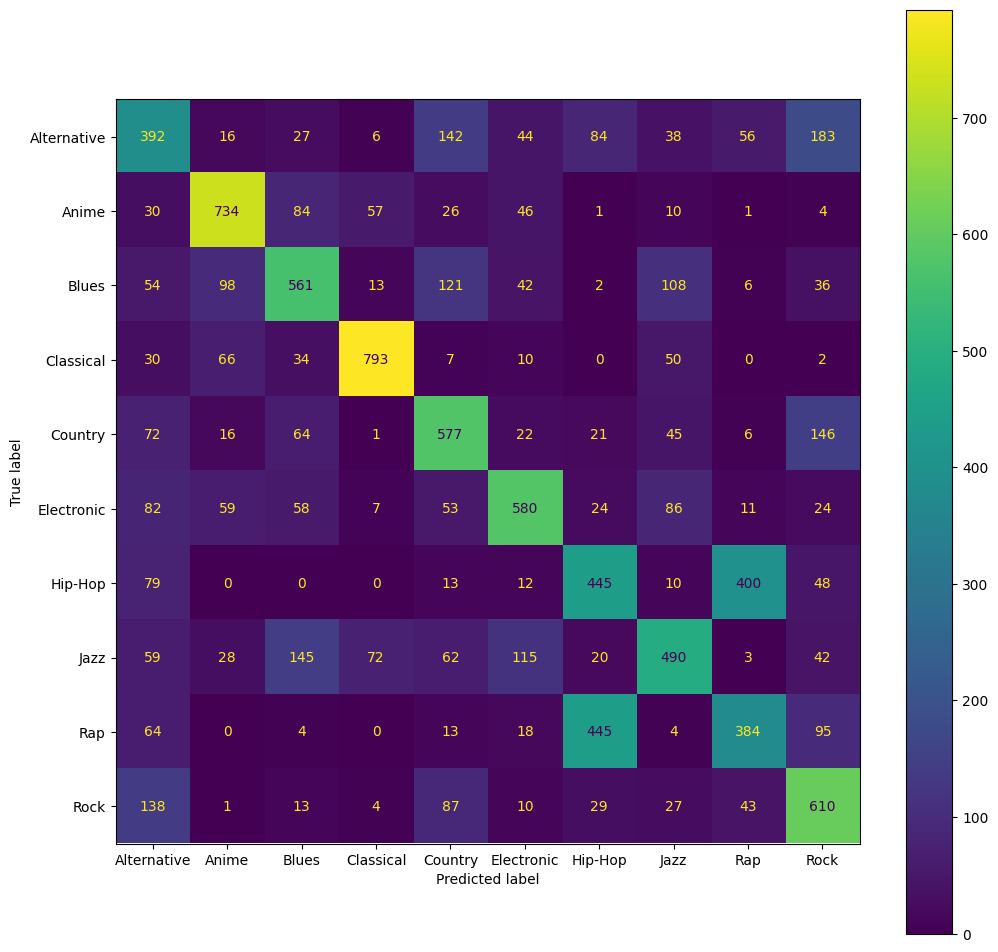

In [38]:
# Comparisons of predictions on trained data vs. untrained data
y_predict = svm_winner.predict(X_train)
print("Scoring on trained data:\n" + classification_report(y_train, y_predict))
y_predict = svm_winner.predict(X_test)
print("Scoring on untrained data:\n" + classification_report(y_test, y_predict))
plt.figure(figsize=(40,40))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
fig = display.ax_.get_figure()
fig.set_figheight(12)
fig.set_figwidth(12)
# Accuracy is marginally higher vs previous values of vector on untrained data

Second Choice: Decision Tree

In [39]:
# Training the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

genre_tree = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
genre_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

In [40]:
print(y.unique())

['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


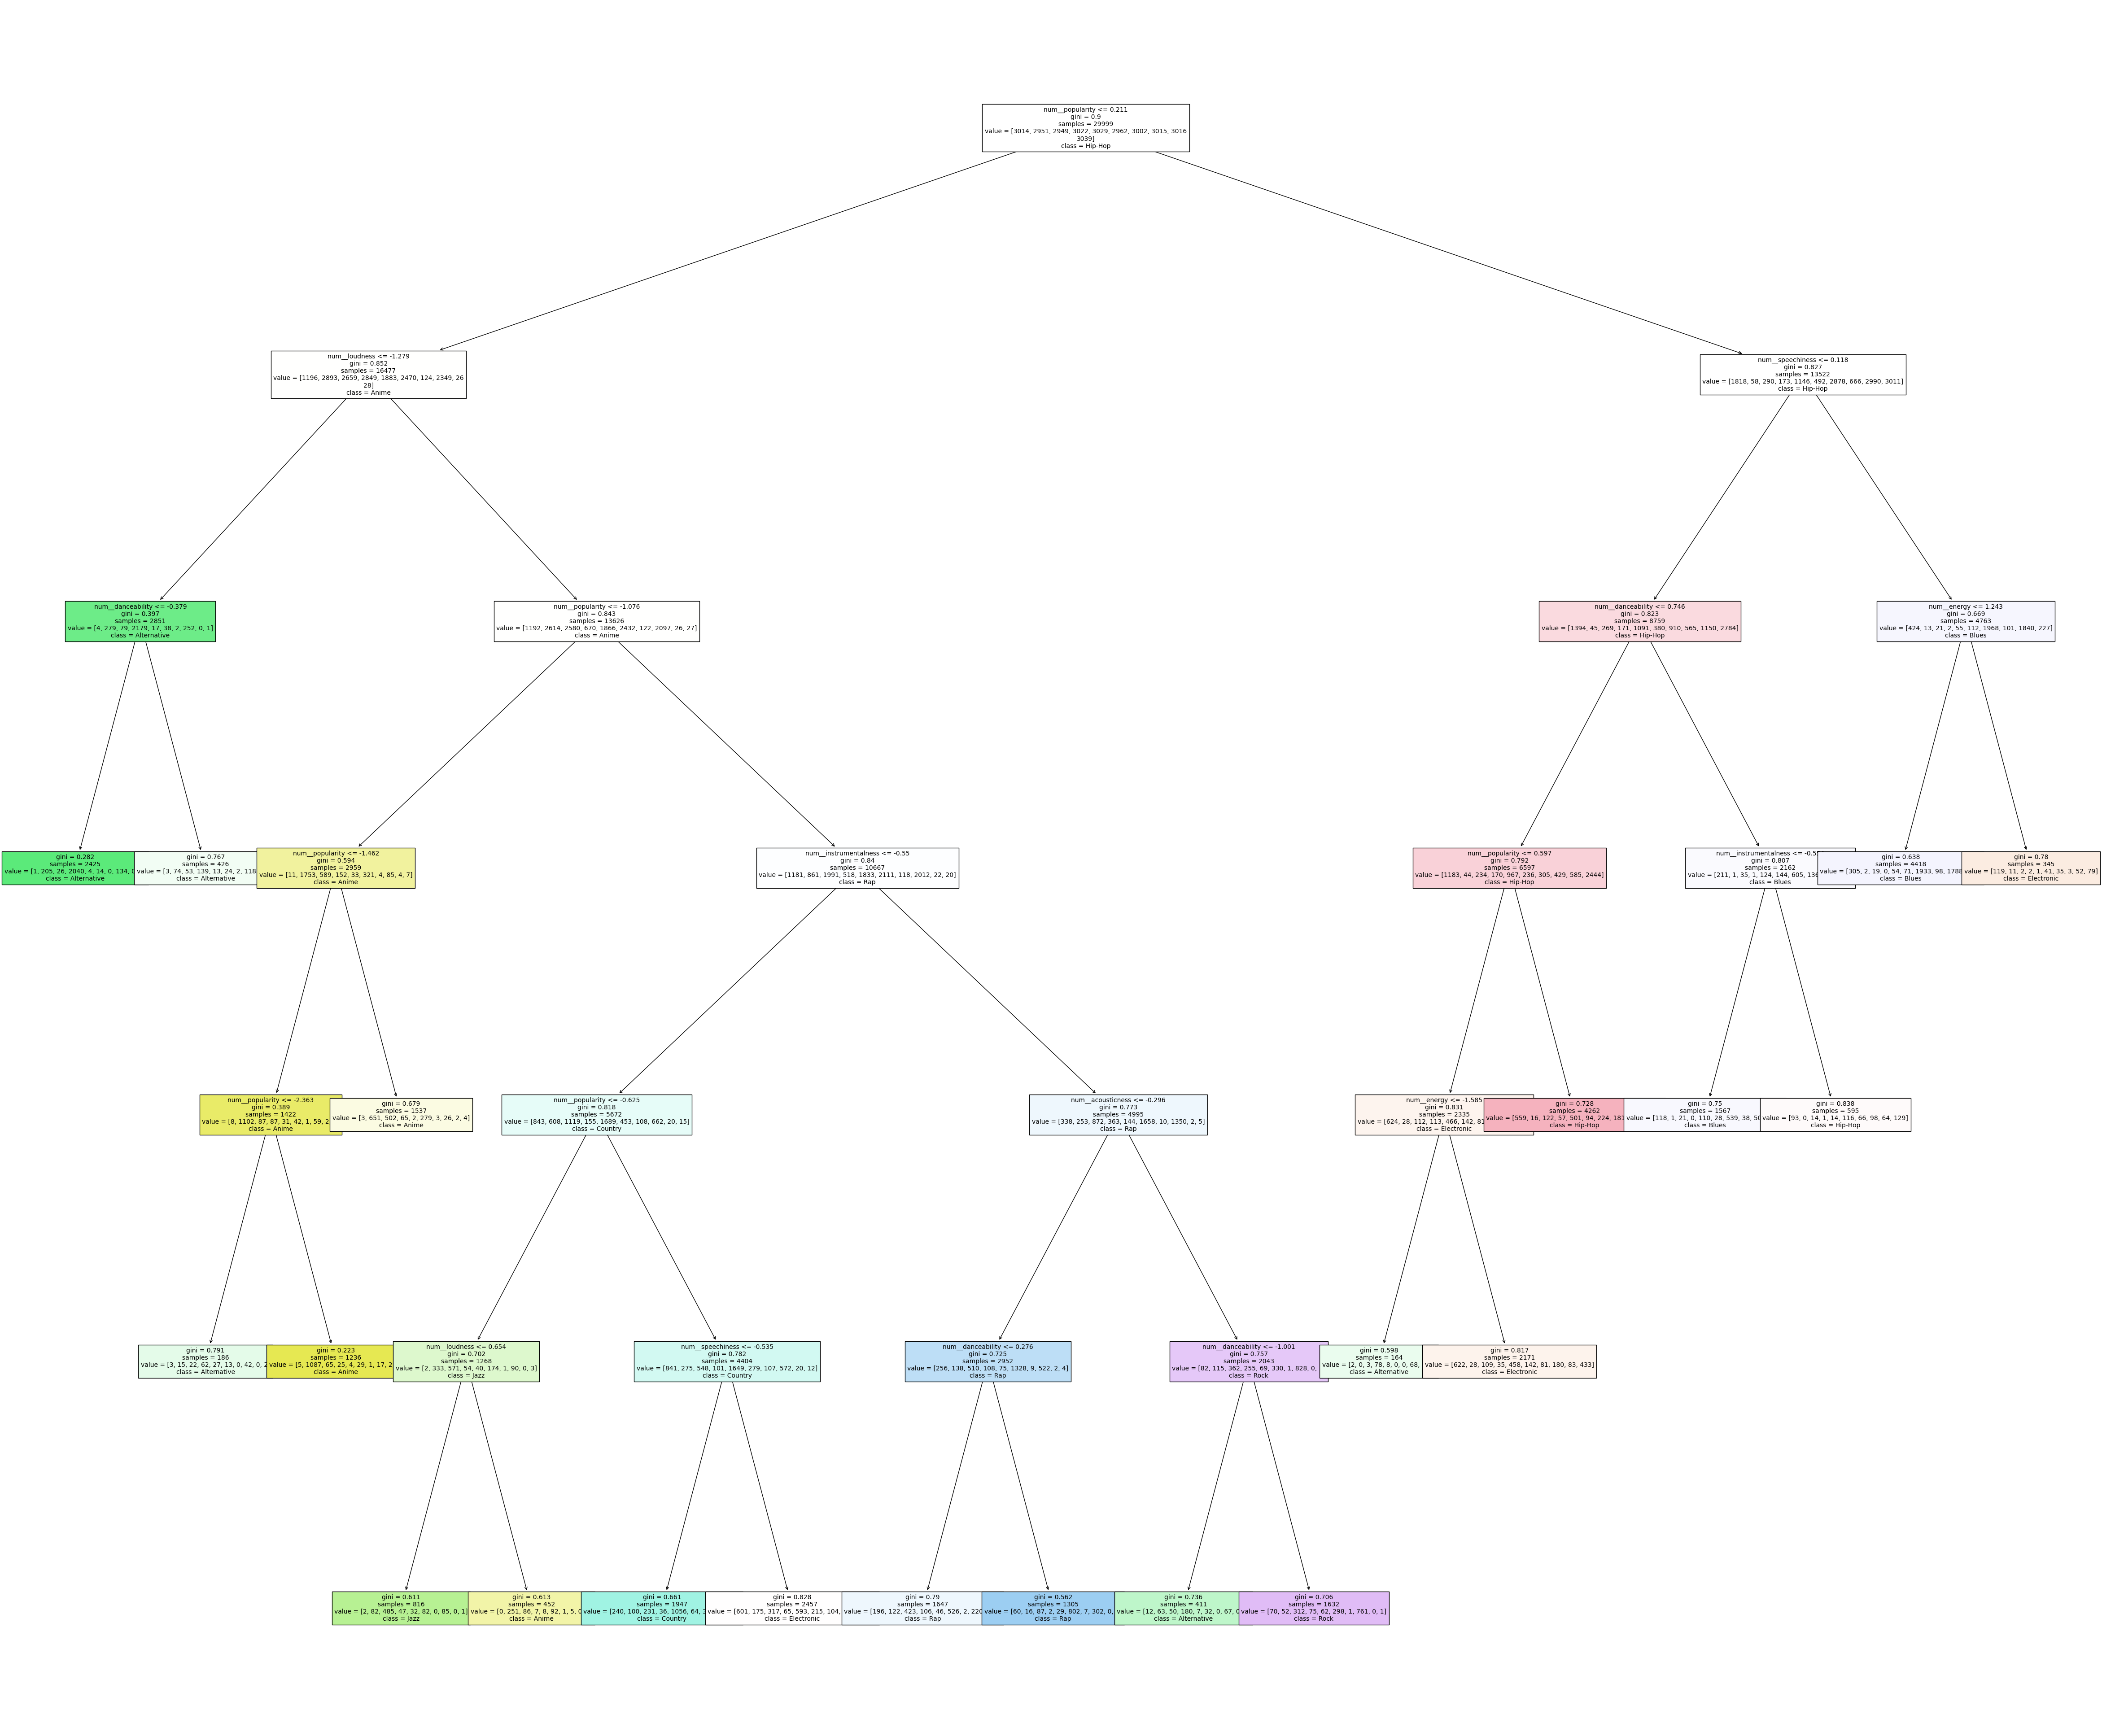

In [41]:
# Plotting the tree
from sklearn import tree
plt.figure(figsize=(60,50))
tree.plot_tree(genre_tree, feature_names=genre_prep.columns.to_list(), class_names=y.unique(), filled=True, fontsize=10)
plt.show()
# Result is not promising? No leaf for Classical with multiple max_leaf_nodes, max_depth values

In [42]:
# Test tree accuracy
y_predict = genre_tree.predict(X_test)
print(classification_report(y_test, y_predict))
# Low accuracy in addition to too many similar end nodes (also missing node for Classical) and no correct guesses on rap genre

              precision    recall  f1-score   support

 Alternative       0.26      0.43      0.32       988
       Anime       0.62      0.68      0.65       993
       Blues       0.57      0.16      0.25      1041
   Classical       0.68      0.81      0.74       992
     Country       0.55      0.36      0.43       970
  Electronic       0.45      0.46      0.45       984
     Hip-Hop       0.40      0.82      0.54      1007
        Jazz       0.48      0.27      0.34      1036
         Rap       0.00      0.00      0.00      1027
        Rock       0.43      0.69      0.53       962

    accuracy                           0.46     10000
   macro avg       0.44      0.47      0.43     10000
weighted avg       0.44      0.46      0.42     10000



C:\Users\trant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

Option 3: Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Finding best params for RandomForestClassifier
# Code adapted from Aneta Kovacheva
params = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5,10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

genre_forest = GridSearchCV(RandomForestClassifier(), param_grid= params)
genre_forest.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
print(genre_forest.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 30}


In [45]:
# Prediction training using the best values for RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 35, max_depth= 15, min_samples_leaf= 2)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=35)

Scoring on trained data:
              precision    recall  f1-score   support

 Alternative       0.86      0.72      0.78      3014
       Anime       0.95      0.92      0.93      2951
       Blues       0.89      0.83      0.86      2949
   Classical       0.97      0.94      0.95      3022
     Country       0.79      0.81      0.80      3029
  Electronic       0.92      0.88      0.90      2962
     Hip-Hop       0.79      0.83      0.81      3002
        Jazz       0.90      0.86      0.88      3015
         Rap       0.80      0.77      0.79      3016
        Rock       0.69      0.93      0.79      3039

    accuracy                           0.85     29999
   macro avg       0.86      0.85      0.85     29999
weighted avg       0.86      0.85      0.85     29999

Scoring on untrained data:
              precision    recall  f1-score   support

 Alternative       0.46      0.34      0.39       988
       Anime       0.79      0.75      0.77       993
       Blues       0.59   

<Figure size 4000x4000 with 0 Axes>

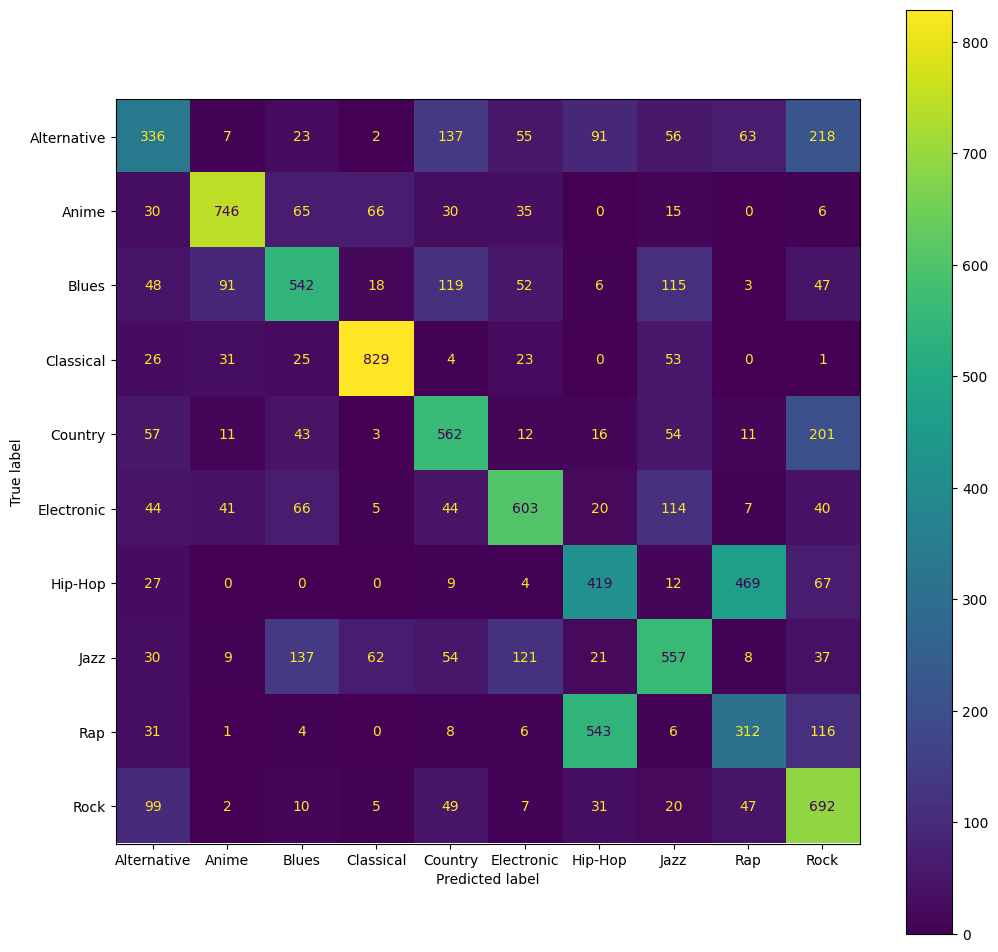

In [46]:
# Comparisons of predictions on trained data vs. untrained data
y_predict = rfc.predict(X_train)
print("Scoring on trained data:\n" + classification_report(y_train, y_predict))
y_predict = rfc.predict(X_test)
print("Scoring on untrained data:\n" + classification_report(y_test, y_predict))
plt.figure(figsize=(40,40))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
fig = display.ax_.get_figure()
fig.set_figheight(12)
fig.set_figwidth(12)
# Better on both trained and untrained data vs. SVC and Decision Tree

In [47]:
# Checking the importance of a feature to the prediction
feature_weight = pd.DataFrame({'Feature': genre_prep.drop(['remainder__music_genre'], axis=1).columns, 'Weight': rfc.feature_importances_})
feature_weight = feature_weight.sort_values('Weight', ascending= False)
print(feature_weight)

                  Feature    Weight
0         num__popularity  0.219847
2       num__danceability  0.096677
1       num__acousticness  0.095534
7           num__loudness  0.094835
8        num__speechiness  0.092901
5   num__instrumentalness  0.092206
4             num__energy  0.074918
10           num__valence  0.062021
3        num__duration_ms  0.051665
9              num__tempo  0.039185
6           num__liveness  0.035809
23        cat__mode_Major  0.007910
24        cat__mode_Minor  0.007505
15            cat__key_C#  0.003305
11             cat__key_A  0.002944
14             cat__key_C  0.002885
16             cat__key_D  0.002875
21             cat__key_G  0.002860
19             cat__key_F  0.002544
18             cat__key_E  0.002292
13             cat__key_B  0.002268
12            cat__key_A#  0.002140
22            cat__key_G#  0.002020
20            cat__key_F#  0.001873
17            cat__key_D#  0.000982


0.9222794831234113


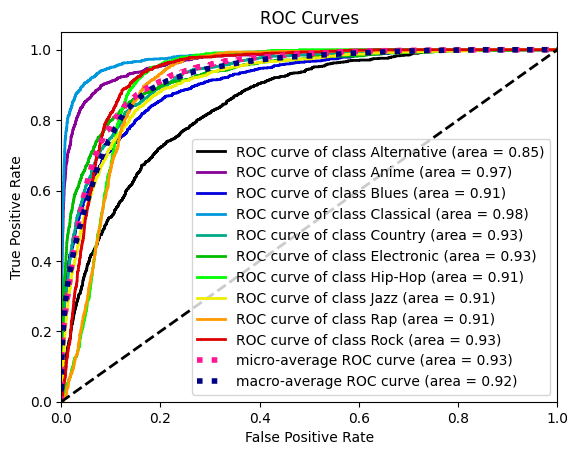

In [67]:
import scikitplot as skplt #requires to first run 'pip install scikit-plot'
from sklearn.metrics import roc_auc_score 

y_predict = rfc.predict_proba(X_test)

#AUC Score
print(roc_auc_score(y_test, y_predict, multi_class= 'ovr'))

# ROC Curve
skplt.metrics.plot_roc(y_test, y_predict)
plt.show()